In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data = pd.read_excel("Strikers_performance.xlsx")

In [4]:
data.isnull().sum()

Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
imputer = SimpleImputer(strategy = 'median')
data[['Movement off the Ball',
            'Big Game Performance',
            'Penalty Success Rate']] = imputer.fit_transform(data[['Movement off the Ball',
                                                              'Big Game Performance',
                                                              'Penalty Success Rate']])

In [7]:
data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                  float64
Assists                       float64
Shots on Target               float64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball         float64
Hold-up Play                  float64
Aerial Duels Won              float64
Defensive Contribution        float64
Big Game Performance          float64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance    float64
Off-field Conduct             float64
dtype: object

In [8]:
variables = ['Goals Scored', 'Assists', 
             'Shots on Target', 
             'Movement off the Ball', 
             'Hold-up Play', 
             'Aerial Duels Won', 
             'Defensive Contribution', 
             'Big Game Performance', 
             'Impact on Team Performance', 
             'Off-field Conduct']

In [8]:
for var in variables:
    data[var] = data[var].astype(int)

In [9]:
round(data.describe(), 2)

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.50,6.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.00,8.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.00,12.00,1.00,1.00,13.00,13.00


In [10]:
freq_footedness = data['Footedness'].value_counts()
perc_footedness = freq_footedness / len(data['Footedness']) * 100

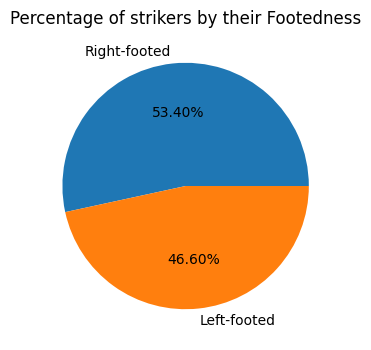

In [11]:
plt.figure(figsize = (8,4))
perc_footedness.plot(kind ='pie', autopct = '%1.2f%%')
plt.title('Percentage of strikers by their Footedness')
plt.ylabel(' ')
plt.show()

In [12]:
goals_by_natioanlity = data.groupby('Nationality')['Goals Scored'].mean().sort_values(ascending = False)
round(goals_by_natioanlity)

Nationality
Brazil     15.0
Spain      15.0
France     14.0
Germany    14.0
England    14.0
Name: Goals Scored, dtype: float64

In [13]:
conversion_rate_by_footedness = data.groupby('Footedness')['Conversion Rate'].mean()
conversion_rate_by_footedness

Footedness
Left-footed     0.198086
Right-footed    0.200592
Name: Conversion Rate, dtype: float64

In [14]:
footedness_by_nationality = pd.crosstab(data['Nationality'], data['Footedness'])
footedness_by_nationality

Footedness,Left-footed,Right-footed
Nationality,,
Brazil,42,53
England,50,59
France,42,51
Germany,44,47
Spain,55,57


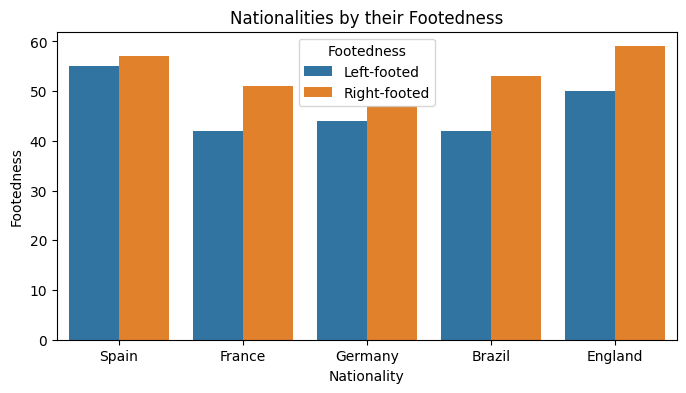

In [15]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'Nationality', hue = 'Footedness', data = data)
plt.title('Nationalities by their Footedness')
plt.xlabel('')
plt.xlabel('Nationality')
plt.ylabel('Footedness')
plt.show()

In [77]:
num_variables = data.select_dtypes(include = ['number']).columns
num_variables

Index(['Striker_ID', 'Footedness', 'Marital Status', 'Goals Scored', 'Assists',
       'Shots on Target', 'Shot Accuracy', 'Conversion Rate',
       'Dribbling Success', 'Movement off the Ball', 'Hold-up Play',
       'Aerial Duels Won', 'Defensive Contribution', 'Big Game Performance',
       'Consistency', 'Penalty Success Rate', 'Impact on Team Performance',
       'Off-field Conduct', 'Total contribution score'],
      dtype='object')

In [17]:
correl_matrix = round(data[num_variables].corr(),3)
correl_matrix

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
Striker_ID,1.000,0.025,0.066,0.003,0.018,0.047,-0.031,0.060,-0.036,0.016,0.012,-0.052,-0.017,-0.006,-0.027,0.103
Goals Scored,0.025,1.000,-0.071,-0.059,0.066,-0.011,0.034,0.016,0.003,-0.047,0.014,-0.004,0.045,-0.021,0.103,-0.053
Assists,0.066,-0.071,1.000,0.072,-0.020,0.028,0.050,0.011,-0.046,0.001,-0.011,0.026,-0.007,-0.081,-0.022,-0.015
Shots on Target,0.003,-0.059,0.072,1.000,-0.021,-0.044,0.010,-0.062,-0.102,-0.068,0.011,0.039,0.049,0.029,0.025,0.055
Shot Accuracy,0.018,0.066,-0.020,-0.021,1.000,-0.088,0.023,-0.018,-0.044,0.012,0.027,-0.019,0.005,0.017,0.041,0.084
Conversion Rate,0.047,-0.011,0.028,-0.044,-0.088,1.000,-0.020,0.038,0.059,0.059,-0.002,0.037,0.031,-0.049,-0.031,-0.004
Dribbling Success,-0.031,0.034,0.050,0.010,0.023,-0.020,1.000,-0.056,0.002,-0.072,0.015,-0.059,-0.030,-0.054,-0.012,-0.060
Movement off the Ball,0.060,0.016,0.011,-0.062,-0.018,0.038,-0.056,1.000,-0.057,0.013,-0.006,-0.075,-0.030,-0.071,-0.046,-0.035
Hold-up Play,-0.036,0.003,-0.046,-0.102,-0.044,0.059,0.002,-0.057,1.000,0.080,0.029,-0.031,0.147,0.068,-0.046,0.035
Aerial Duels Won,0.016,-0.047,0.001,-0.068,0.012,0.059,-0.072,0.013,0.080,1.000,-0.025,-0.013,0.047,-0.002,0.043,0.004


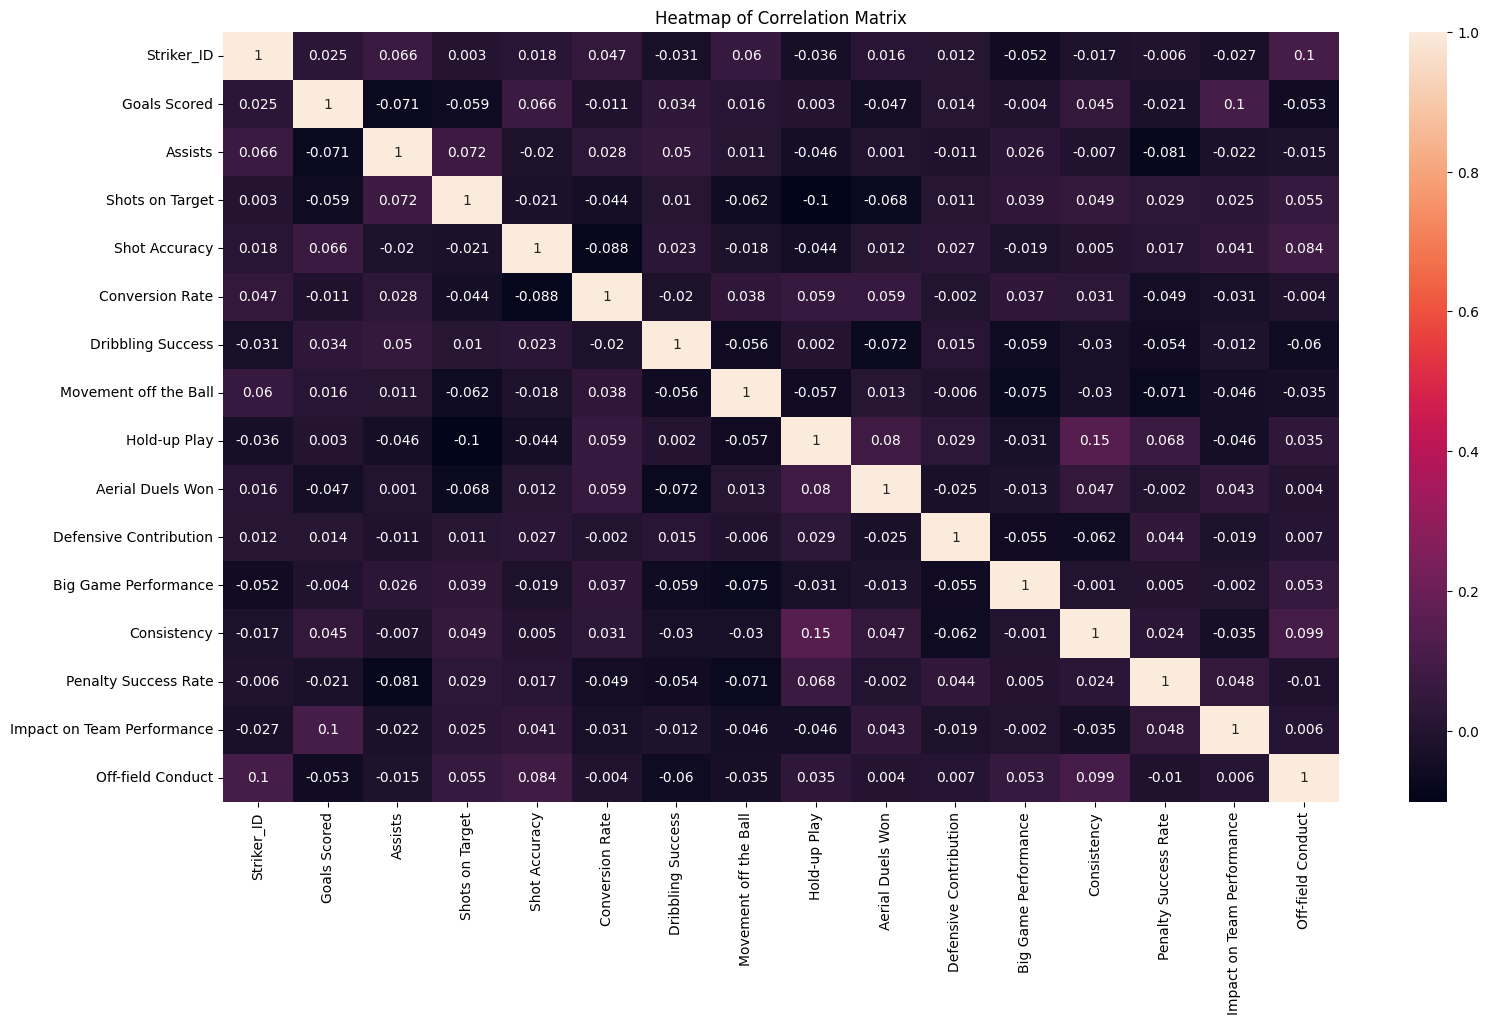

In [18]:
plt.figure(figsize = (18,10))
sns.heatmap(correl_matrix, annot = True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [19]:
stat, p_value = shapiro(data['Consistency'])
print('P Value:', round(p_value,2))

P Value: 0.45


In [20]:
Spain = data.query('Nationality == "Spain"')['Consistency']
Germany = data.query('Nationality == "Germany"')['Consistency']
France = data.query('Nationality == "France"')['Consistency']
Brazil = data.query('Nationality == "Brazil"')['Consistency']
England = data.query('Nationality == "England"')['Consistency']

In [21]:
Test_stat, p_value = stats.f_oneway (Spain,Germany, France, Brazil, England)
print(p_value)

0.19278675901599154


In [22]:
alpha = 0.05
if p_value<alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis


In [23]:
stats, p_value = levene(Spain,Germany, France, Brazil, England)
print(p_value)
alpha = 0.05
if p_value<alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

0.8083990350934653
Fail to reject null hypothesis


In [24]:
from scipy.stats import chi2_contingency

In [25]:
chi2_crosstab = pd.crosstab(data['Nationality'], data['Consistency'])
chi2, p_value, dof, expected = chi2_contingency(chi2_crosstab)
print(p_value)
alpha = 0.05
if p_value<alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

0.4604888887434182
Fail to reject null hypothesis


In [26]:
stat, p_value = shapiro(data['Hold-up Play'])
print(p_value)

0.15094090394128723


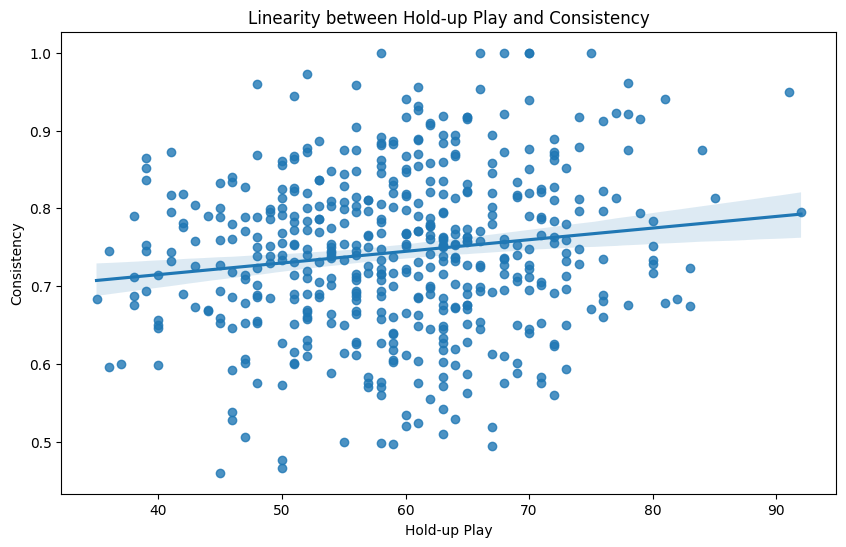

In [27]:
plt.figure(figsize = (10, 6))
sns.regplot(x = 'Hold-up Play', y = 'Consistency', data = data)
plt.title('Linearity between Hold-up Play and Consistency')
plt.xlabel('Hold-up Play')
plt.ylabel('Consistency')
plt.show()

In [28]:
data['Total contribution score'] = (data['Goals Scored'] + data['Assists'] + data['Shots on Target'] + data['Dribbling Success'] + data['Aerial Duels Won'] + data['Defensive Contribution'] + data['Big Game Performance'] + data['Consistency'])
data.sort_values(by = 'Total contribution score', ascending = False)

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score
497,498,England,Left-footed,Yes,14,9,33,0.511813,0.186012,0.575824,69,56,25,71,5,0.628260,0.747261,11,6,158.204084
420,421,Brazil,Right-footed,No,25,11,28,0.402070,0.252366,0.628117,63,78,26,56,7,0.875228,0.825737,6,10,154.503345
102,103,Spain,Left-footed,No,13,10,39,0.535404,0.156517,0.636464,86,80,26,56,7,0.728612,0.891262,7,8,152.365076
489,490,Brazil,Right-footed,Yes,19,8,33,0.643192,0.104016,0.941168,54,52,20,63,6,0.710601,0.794205,8,9,150.651769
453,454,France,Right-footed,Yes,17,12,43,0.534623,0.164212,0.852101,64,65,21,49,4,0.830959,0.733155,9,5,147.683060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,140,France,Right-footed,Yes,8,4,29,0.493247,0.126624,0.739793,67,64,20,11,5,0.773161,0.795853,9,4,78.512953
396,397,France,Right-footed,Yes,6,7,15,0.574120,0.153907,0.491589,75,73,15,23,7,0.592885,0.727979,9,10,74.084473
117,118,Germany,Right-footed,Yes,9,10,24,0.524821,0.150283,0.708200,62,57,10,11,5,0.717399,1.000000,6,10,70.425598
350,351,Brazil,Left-footed,No,16,6,16,0.535377,0.252997,0.645173,64,54,9,13,8,0.774313,0.687958,5,12,69.419487


In [29]:
HU_play = data['Hold-up Play']
Consistency = data['Consistency']

In [30]:
corr, p_value = pearsonr(HU_play, Consistency)
print('Correlation coefficient:', round(corr,3))
print('P Value:', round(p_value,3))

Correlation coefficient: 0.147
P Value: 0.001


In [31]:
encoder = LabelEncoder()
data['Footedness'] = encoder.fit_transform(data['Footedness'])
data['Marital Status'] = encoder.fit_transform(data['Marital Status'])

In [32]:
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123


In [33]:
dummies = pd.get_dummies(data['Nationality'])
processed_df = pd.concat([data, dummies], axis = 1)
processed_df =processed_df.drop('Nationality', axis =1)
processed_df

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.820314,0.922727,8,11,113.577376,False,False,False,False,True
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.803321,0.678984,3,8,110.600139,False,False,True,False,False
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.766540,0.843858,8,9,94.433410,False,False,False,True,False
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.611798,0.662997,6,8,124.250575,False,False,True,False,False
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.701638,0.906538,8,6,107.293123,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0,1,17,7,39,0.707015,0.240660,0.707748,89,...,0.767147,0.770213,5,12,135.474895,False,True,False,False,False
496,497,1,1,9,13,39,0.597348,0.186052,0.725775,78,...,0.865265,0.876903,5,8,130.591040,False,False,False,True,False
497,498,0,1,14,9,33,0.511813,0.186012,0.575824,69,...,0.628260,0.747261,11,6,158.204084,False,True,False,False,False
498,499,1,1,10,6,32,0.583693,0.239519,0.733418,68,...,0.796795,0.799489,1,11,108.530213,False,True,False,False,False


In [34]:
x = processed_df.drop('Striker_ID', axis = 1)
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x)
    wcss_score = kmeans.inertia_
    wcss.append(wcss_score)

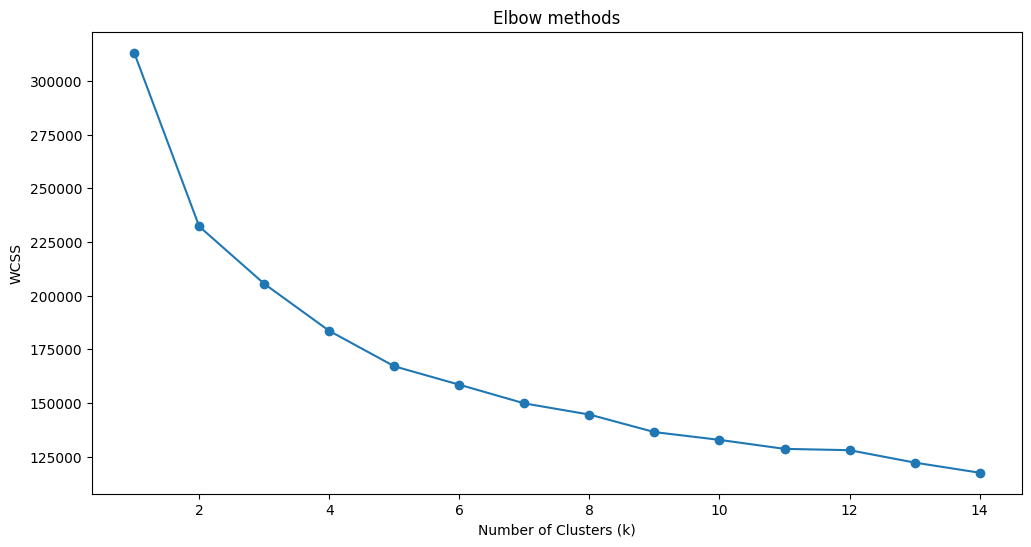

In [35]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 15), wcss, marker = 'o')
plt.title('Elbow methods')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [36]:
final_km = KMeans(n_clusters = 2)
final_km.fit(x)
labels = final_km.labels_
labels

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,

In [37]:
processed_df['Clusters'] = labels
processed_df.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain,Clusters
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.922727,8,11,113.577376,False,False,False,False,True,1
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.678984,3,8,110.600139,False,False,True,False,False,1
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.843858,8,9,94.433410,False,False,False,True,False,1
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.662997,6,8,124.250575,False,False,True,False,False,0
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.906538,8,6,107.293123,False,False,True,False,False,1


In [38]:
mapping = {0 : 'Best Strikers', 1 : 'Regular Strikers'}
processed_df['Strikers Types'] = processed_df['Clusters'].map(mapping)

In [39]:
processed_df = processed_df.drop('Clusters', axis = 1)

In [40]:
processed_df

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain,Strikers Types
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.922727,8,11,113.577376,False,False,False,False,True,Regular Strikers
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.678984,3,8,110.600139,False,False,True,False,False,Regular Strikers
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.843858,8,9,94.433410,False,False,False,True,False,Regular Strikers
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.662997,6,8,124.250575,False,False,True,False,False,Best Strikers
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.906538,8,6,107.293123,False,False,True,False,False,Regular Strikers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0,1,17,7,39,0.707015,0.240660,0.707748,89,...,0.770213,5,12,135.474895,False,True,False,False,False,Best Strikers
496,497,1,1,9,13,39,0.597348,0.186052,0.725775,78,...,0.876903,5,8,130.591040,False,False,False,True,False,Best Strikers
497,498,0,1,14,9,33,0.511813,0.186012,0.575824,69,...,0.747261,11,6,158.204084,False,True,False,False,False,Best Strikers
498,499,1,1,10,6,32,0.583693,0.239519,0.733418,68,...,0.799489,1,11,108.530213,False,True,False,False,False,Best Strikers


In [41]:
mapping = {'Best Strikers' : 1, 'Regular Strikers' : 0}
processed_df['Strikers Types'] = processed_df['Strikers Types'].map(mapping)

In [42]:
x = processed_df.drop(['Striker_ID', 'Strikers Types'], axis = 1)
y = processed_df['Strikers Types']

In [43]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
scaled_x

array([[-1.07047781, -1.03252879,  0.5050467 , ..., -0.47801802,
        -0.47169258,  1.86125917],
       [-1.07047781,  0.968496  , -0.10638998, ...,  2.09197134,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879,  0.70885893, ..., -0.47801802,
         2.12002488, -0.53727069],
       ...,
       [-1.07047781,  0.968496  , -0.10638998, ..., -0.47801802,
        -0.47169258, -0.53727069],
       [ 0.93416229,  0.968496  , -0.9216389 , ..., -0.47801802,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879, -1.32926335, ..., -0.47801802,
        -0.47169258, -0.53727069]], shape=(500, 23))

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state = 42)

In [46]:
lgr_model = LogisticRegression()
lgr_model.fit(x_train, y_train)
y_lgr_pred = lgr_model.predict(x_test)

In [47]:
accuracy_lgr = accuracy_score(y_test, y_lgr_pred)
print(accuracy_lgr * 100, '%')

96.0 %


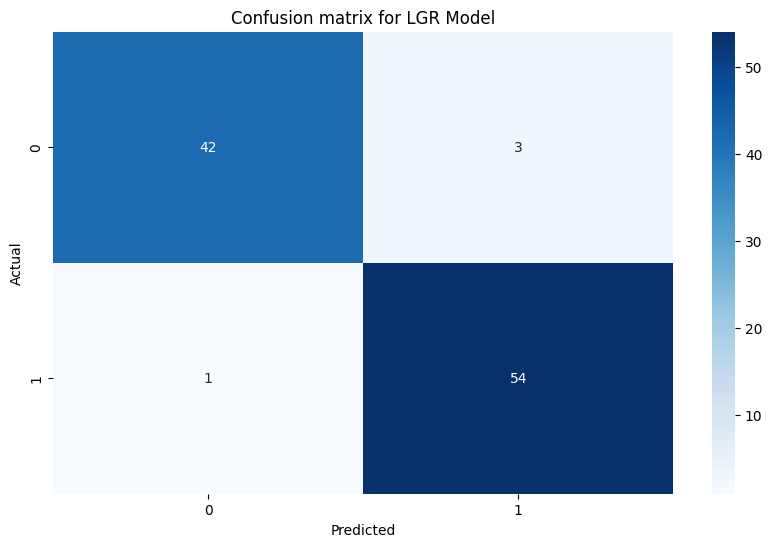

In [48]:
conf_matrix_lgr = confusion_matrix(y_test, y_lgr_pred)
plt.figure(figsize = (10,6))
sns.heatmap(conf_matrix_lgr, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion matrix for LGR Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)
y_dtc_pred = dtc_model.predict(x_test)
dtc_accuracy = accuracy_score(y_test, y_dtc_pred)
print(dtc_accuracy * 100, '%')

96.0 %


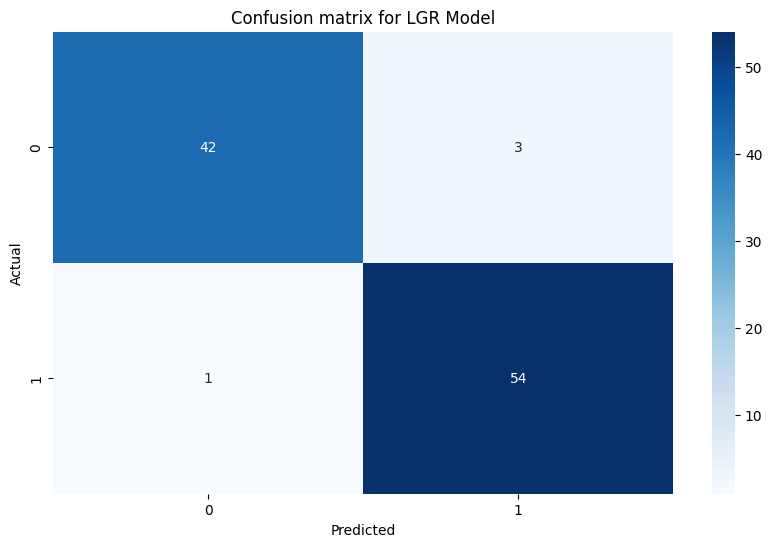

In [51]:
conf_matrix_dtc = confusion_matrix(y_test, y_dtc_pred)
plt.figure(figsize = (10,6))
sns.heatmap(conf_matrix_lgr, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion matrix for LGR Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
y_rfc_pred = rfc_model.predict(x_test)
rfc_accuracy = accuracy_score(y_test, y_rfc_pred)
print(rfc_accuracy * 100, '%')

100.0 %


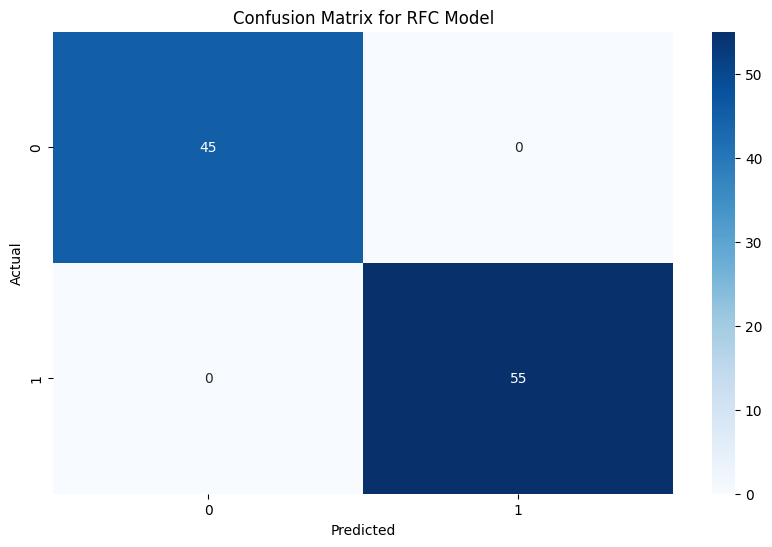

In [54]:
rfc_confusion = confusion_matrix(y_test, y_rfc_pred)
plt.figure(figsize=(10,6))
sns.heatmap(rfc_confusion, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix for RFC Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)
y_dtc_pred = dtc_model.predict(x_test)
accuracy_dtc = accuracy_score(y_test, y_dtc_pred)
confusion_dtc = confusion_matrix(y_test, y_dtc_pred)
print(accuracy_dtc *100, '%')

96.0 %


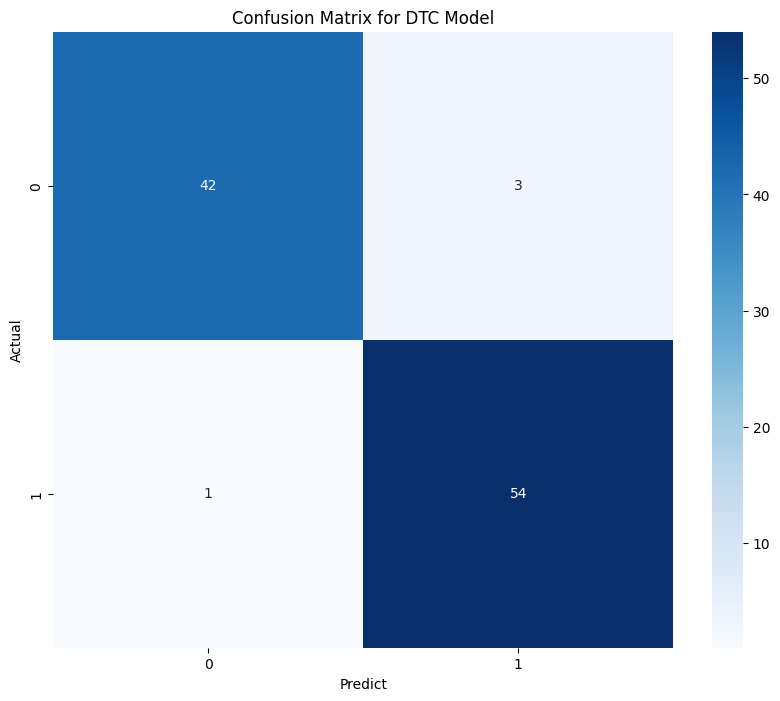

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_dtc, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix for DTC Model')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lgr_model = LogisticRegression()
lgr_model.fit(x_train, y_train)
y_lgr_pred = lgr_model.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_lgr_pred)
confusion_lgr = confusion_matrix(y_test, y_lgr_pred)
print(accuracy_lgr*100, '%')

96.0 %


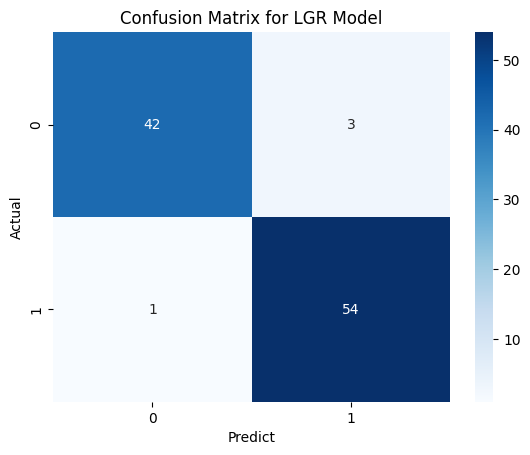

In [60]:
sns.heatmap(confusion_lgr, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix for LGR Model')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
y_rfc_pred = rfc_model.predict(x_test)
accuracy_rfc = accuracy_score(y_test, y_rfc_pred)
confusion_rfc = confusion_matrix(y_test, y_rfc_pred)
print(accuracy_rfc * 100, '%')

100.0 %


Text(0.5, 36.72222222222221, 'Predict')

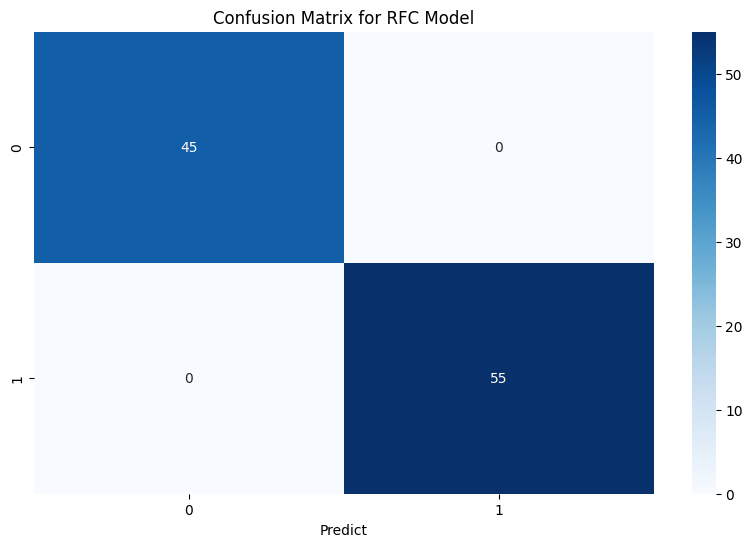

In [63]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_rfc, annot =True, fmt= 'd', cmap = 'Blues')
plt.title('Confusion Matrix for RFC Model')
plt.xlabel('Predict')

In [64]:
x_without = processed_df.drop(['Goals Scored'], axis =1)
y_without = processed_df['Goals Scored']

In [65]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [66]:
lrr_model = LinearRegression()
lrr_model.fit(x_train, y_train)
y_lrr_pred = lrr_model.predict(x_test)
mse_lrr = mean_squared_error(y_test, y_lrr_pred)
print('Mean Squared Error', mse_lrr)

Mean Squared Error 0.10020823345174984


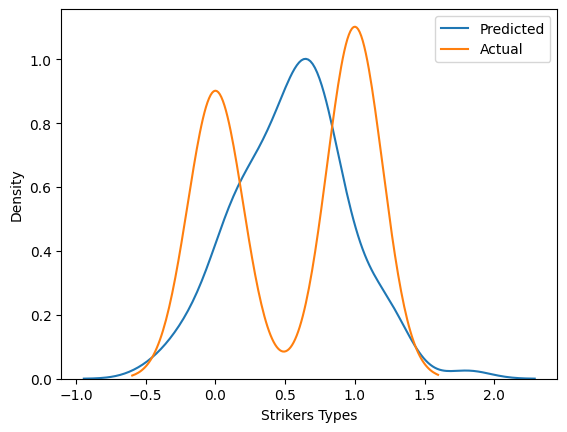

In [67]:
sns.kdeplot(y_lrr_pred, label = 'Predicted')
sns.kdeplot(y_test, label = 'Actual')
plt.legend()
plt.show()

MSE 0.02


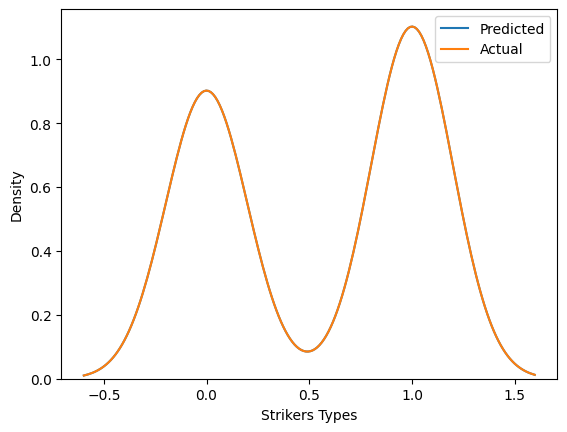

In [68]:
dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train, y_train)
y_dtr_model = dtr_model.predict(x_test)
mse_dtr = mean_squared_error(y_test, y_dtr_model)
print('MSE', mse_dtr)
sns.kdeplot(y_dtr_model, label = 'Predicted')
sns.kdeplot(y_test, label = 'Actual')
plt.legend()
plt.show()

MSE 0.004810999999999999


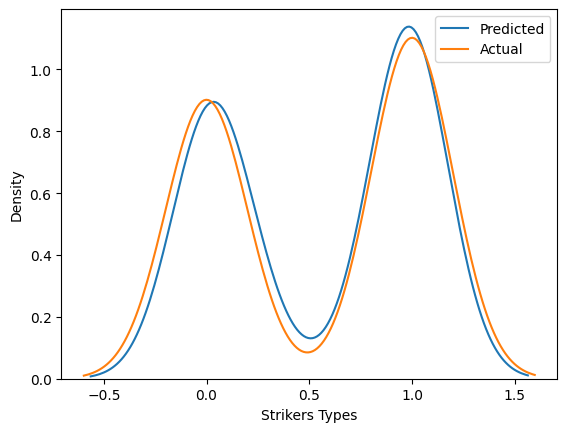

In [69]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train,y_train)
y_rfr_pred = rfr_model.predict(x_test)
mse_rfr = mean_squared_error(y_test, y_rfr_pred)
print('MSE', mse_rfr)

sns.kdeplot(y_rfr_pred, label = 'Predicted')
sns.kdeplot(y_test, label = 'Actual')
plt.legend()
plt.show()

In [71]:
models = {"Linear Regression" : LinearRegression(),
          "DecisionTree" : DecisionTreeRegressor(),
          "RandomForest": RandomForestRegressor()}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE:{mse}")

Linear Regression MSE:0.10020823345174984
DecisionTree MSE:0.03
RandomForest MSE:0.006517000000000002


MSE 0.10020823345174984


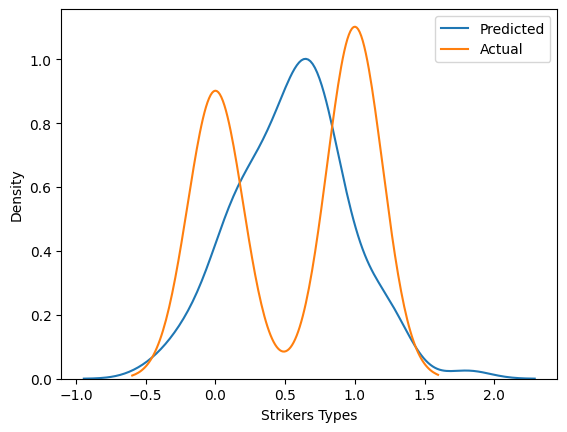

In [74]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_lr_pred = lr_model.predict(x_test)
mse = mean_squared_error(y_test, y_lr_pred)
print("MSE", mse)
sns.kdeplot(y_lr_pred, label = 'Predicted')
sns.kdeplot(y_test, label='Actual')
plt.legend()
plt.show()

MSE 0.006043000000000001


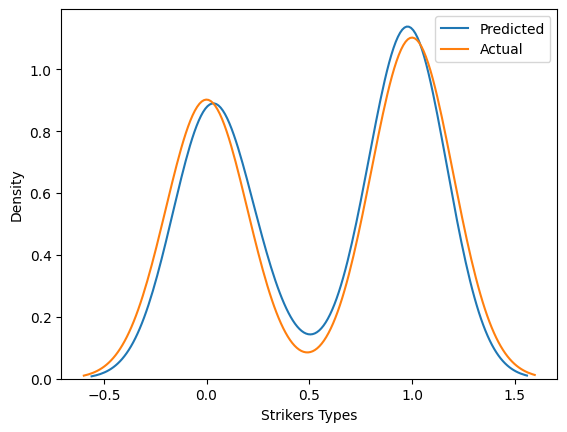

In [75]:
rfrr_model = RandomForestRegressor()
rfrr_model.fit(x_train, y_train)
y_rfrr_pred = rfrr_model.predict(x_test)
mse_rfrr = mean_squared_error(y_test, y_rfrr_pred)
print("MSE", mse_rfrr)

sns.kdeplot(y_rfrr_pred, label = 'Predicted')
sns.kdeplot(y_test, label = 'Actual')
plt.legend()
plt.show()